<a href="https://colab.research.google.com/github/hellomstars/MachineLearning/blob/main/Machine%20Learning%20of%20Multiple%20Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #3.Machine Learning of Multiple Features
### 공부일 수, 끝낸 문제집 수, 사용한 연필 수를 통해 용돈 알아보기

In [ ]:
import pandas as pd
import numpy as np

## 데이터셋 생성하기

- 난수가 겹치지 않게 각 특성 별로 데이터 100만 개 생성

In [ ]:
import random

def Random_trait(a,b):
    trait_list = []
    trait_fin_list = []
    trait_set = set()

    while len(trait_set) < 1000000: # 최종적으로 난수 데이터들이 모이는 변수 trait_set에 1000000개의 데이터가 있어야한다
        for i in range(1000000-len(trait_set)):  #if num not in trait_list -> trait_list.append(num)을 한 결과, 실행시간이 오래걸림
            num = round(random.uniform(a,b),4) # a에서 b 숫자 중 소숫점 4자리의 난수를 지정한다
            trait_list.append(num) #list에 저장
        trait_set = set.union(trait_set, set(trait_list)) #겹치는 숫자를 걸러내기 위해 set함수에 저장한다. list역시 set으로 변환해 저장
    trait_fin_list = list(trait_set) #set으로 묶인 데이터들을 다시 list로 묶는다
    return sorted(trait_fin_list) #list 안의 데이터를 순차적으로 정리하여 출력

Study_day = Random_trait(1,365) #공부한 일 수 출력
Fin_book = Random_trait(0,300) #끝낸 책 수 출력
Fin_pencil = Random_trait(1,150) #다 쓴 연필 수 출력
Allowance = Random_trait(100000,1000000) #용돈 출력

print(len(Study_day), len(Fin_book), len(Fin_pencil), len(Allowance)) #난수데이터가 100만개씩 제대로 저장됐나 확인

1000000 1000000 1000000 1000000


- train set, test set 분류

In [ ]:
df = pd.DataFrame({'day' : Study_day, 'book' : Fin_book, 'pencil' : Fin_pencil}) #각각의 특성을 dataframe으로 모아서 저장한다
print(df.head(10)) #데이터 10개 출력해보기

      day    book  pencil
0  1.0002  0.0002  1.0000
1  1.0008  0.0011  1.0001
2  1.0012  0.0012  1.0003
3  1.0020  0.0015  1.0004
4  1.0021  0.0017  1.0005
5  1.0023  0.0019  1.0006
6  1.0024  0.0021  1.0007
7  1.0025  0.0023  1.0008
8  1.0027  0.0027  1.0009
9  1.0028  0.0030  1.0010


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(df, Allowance, random_state=42)
print(len(train_input), len(test_input), len(train_target), len(test_target)) #train set, test set이 잘 split 됐나 확인

750000 250000 750000 250000


- 데이터 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler() #표준화로 scaling
ss.fit(train_input)

train_ss_scaled = ss.transform(train_input)
test_ss_scaled = ss.transform(test_input)

In [ ]:
mm = MinMaxScaler() #정규화로 scaling
mm.fit(train_input)

train_mm_scaled = mm.transform(train_input)
test_mm_scaled = mm.transform(test_input)

In [ ]:
print(f"train set 표준화 후 평균 : {round(train_ss_scaled.mean(),2)}")
print(f"train set 표준화 후 분산 : {round(train_ss_scaled.var(),2)}\n")

print(f"test set 표준화 후 평균 : {round(test_ss_scaled.mean(),2)}")
print(f"test set 표준화 후 분산 : {round(test_ss_scaled.var(),2)}\n") #표준화 후 평균, 분산이 0,1로 대략 scaling 됨

print(f"train set 정규화 후 최솟값 : {train_mm_scaled.min()}")
print(f"train set 정규화 후 최댓값 : {train_mm_scaled.max()}\n")

print(f"test set 정규화 후 최솟값 : {round(test_mm_scaled.min(),2)}")
print(f"test set 정규화 후 최댓값 : {round(test_mm_scaled.max(),2)}") #정규화 후 최솟값, 최댓값이 0,1로 대략 scaling 됨

train set 표준화 후 평균 : -0.0
train set 표준화 후 분산 : 1.0

test set 표준화 후 평균 : -0.0
test set 표준화 후 분산 : 1.0

train set 정규화 후 최솟값 : 0.0
train set 정규화 후 최댓값 : 1.0

test set 정규화 후 최솟값 : -0.0
test set 정규화 후 최댓값 : 1.0


## 다중 회귀 모델

In [ ]:
from sklearn.linear_model import LinearRegression #다중 회귀 모델은 특성이 여러개일 뿐, 선형 회귀 모델 훈련과 같다.

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target)) #모델 훈련 결과 train 데이터와 test 데이터의 점수가 거의 완벽하다

0.9999987447487687
0.9999987412670462


## 릿지 회귀

- 표준화 데이터 사용

In [ ]:
#계수를 제곱한 값을 기준으로 규제 적용
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_ss_scaled, train_target) #fit() 메서드에서 표준화 된 데이터로 훈련

print(ridge.score(train_ss_scaled, train_target)) #score()메서드로 평가
print(ridge.score(test_ss_scaled, test_target)) #train 데이터와 test 데이터 모두 좋은 성능을 내고 있다

0.9999987309768107
0.9999987283691028


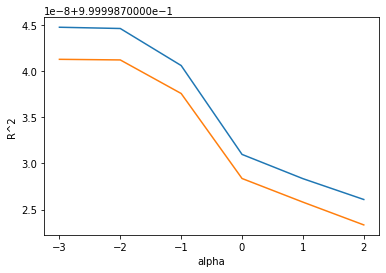

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] #alpha값으로 규제 강도 조절하여 릿지 모델을 만들 수 있다

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha) 
    ridge.fit(train_ss_scaled, train_target) #릿지 모델 훈련
    train_score.append(ridge.score(train_ss_scaled, train_target))
    test_score.append(ridge.score(test_ss_scaled, test_target))
    
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() #현재 train 데이터와 test 데이터가 큰 차이 없이 좋은 성능임을 알 수 있다

- alpha 값을 바꾼다면?

In [ ]:
ridge = Ridge(alpha=0.01) #성능이 전보다는 오히려 안 좋아 짐
ridge.fit(train_ss_scaled, train_target)

print(ridge.score(train_ss_scaled, train_target))
print(ridge.score(test_ss_scaled, test_target))

0.9999987446116828
0.9999987412076442


- 정규화 데이터 사용

In [ ]:
ridge = Ridge()
ridge.fit(train_mm_scaled, train_target) #fit() 메서드에서 정규화 된 데이터로 훈련

print(ridge.score(train_mm_scaled, train_target)) 
print(ridge.score(test_mm_scaled, test_target))

0.9999984436494305
0.9999984381877656


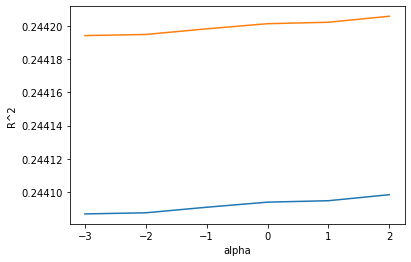

In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_ss_scaled, train_target)
    train_score.append(ridge.score(train_mm_scaled, train_target))
    test_score.append(ridge.score(test_mm_scaled, test_target))
    
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() #현재 train 데이터와 test 데이터가 큰 차이 없이 좋은 성능임을 알 수 있다

## 라쏘 회귀

- 표준화 데이터 사용

In [ ]:
#계수의 절댓값을 기준으로 규제 적용
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_ss_scaled, train_target)
print(lasso.score(train_ss_scaled, train_target))
print(lasso.score(test_ss_scaled, test_target))

0.9999985041783702
0.9999985033851543


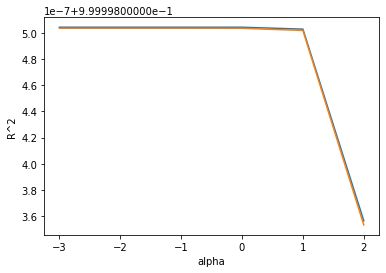

In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_ss_scaled, train_target) # 라쏘 모델 훈련
    train_score.append(lasso.score(train_ss_scaled, train_target))
    test_score.append(lasso.score(test_ss_scaled, test_target))
    
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() #현재 train 데이터와 test 데이터가 그래프 상 큰 차이 없음. 가장 오른쪽에서 점수가 크게 떨어짐.

- alpha 값을 바꾼다면?

In [ ]:
lasso = Lasso(alpha=100) # alpha 값을 100으로 올리니 전보다 성능 나빠짐
lasso.fit(train_ss_scaled, train_target)

print(lasso.score(train_ss_scaled, train_target)) #모델 최적의 alpha = 1, 즉 10.
print(lasso.score(test_ss_scaled, test_target))

0.9999983565048424
0.9999983533436895


- 정규화 데이터 사용

In [ ]:
lasso = Lasso()
lasso.fit(train_mm_scaled, train_target)

print(lasso.score(train_mm_scaled, train_target))
print(lasso.score(test_mm_scaled, test_target))

0.9999967294791049
0.999996720431553


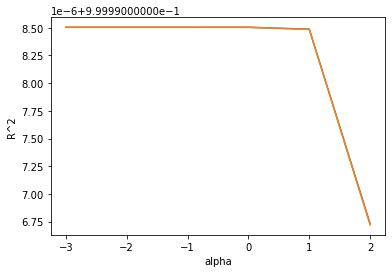

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000) 
    lasso.fit(train_mm_scaled, train_target) # 라쏘 모델을 훈련합니다
    train_score.append(lasso.score(train_mm_scaled, train_target))
    test_score.append(lasso.score(test_mm_scaled, test_target))
    
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() #현재 train 데이터와 test 데이터가 그래프 상 큰 차이 없음.

- alpha 값을 바꾼다면?

In [ ]:
lasso = Lasso(alpha=1/1000)
lasso.fit(train_mm_scaled, train_target)

print(lasso.score(train_mm_scaled, train_target))
print(lasso.score(test_mm_scaled, test_target))

0.9999985041904702
0.9999985034207496
